# データの読み込みとデータの内容・目的について

## データの読み込み
Titanicデータセットを.csvファイルから読み込む。今回はデータ分析のみ行うので教師データ(train.csv)のみ読み込む

In [1]:
# モジュールのインポート
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# train.csvファイルの読み込みと表示
df_titanic = pd.read_csv('C:/Users/0175216/Project/Practice02-H/titanic/train.csv')

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## データセットのパラメータの表示

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- パラメータ(11個：連続量:2個、離散量:4個、オブジェクト:5個)
  - PssengerID(乗客番号)
  - Pclass(搭乗クラス)
  - Name(名前)
  - Sex(性別)
  - Age(年齢)
  - SibSp(タイタニックに乗っている配偶者/兄弟の数)
  - Parch(タイタニックに乗っている両親/子供の数)
  - Ticket(チケット番号)
  - Fare(チケットに支払った料金)
  - Cabin(部屋番号)
  - Embarked(搭乗地)
  
- クラス(分類)
  - Survived(生死)
 

In [4]:
# 欠損データ数の確認
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## データの目的

11個のパラメータからタイタニック号に乗船していた人の生死を推測する。データ数891個

# 統計解析

## 基礎統計量

In [5]:
# 基礎統計量の表示
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# データの可視化

## ヒストグラム

数値パラメータは7つなのでこれらの値に対してヒストグラムを表示してデータを確認する

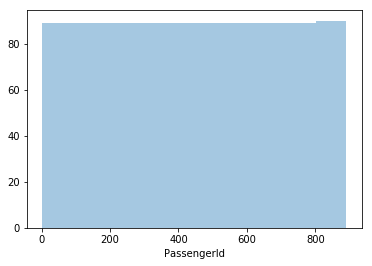

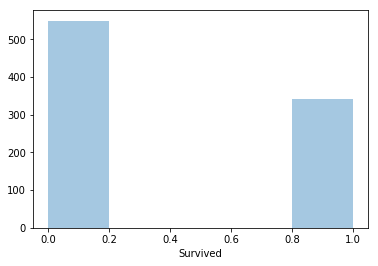

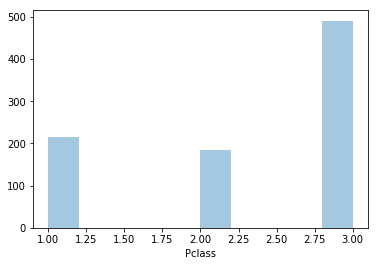

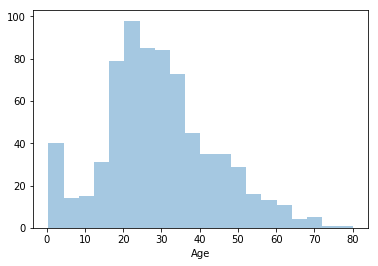

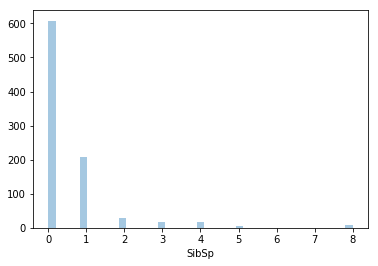

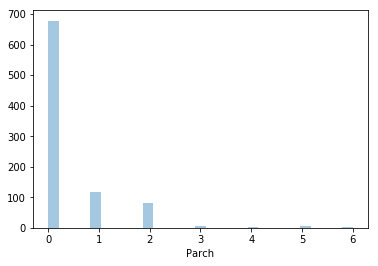

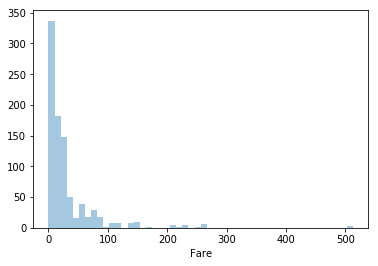

In [6]:
for data in df_titanic.columns:
    if df_titanic[data].dtypes != 'object':
        sns.distplot(df_titanic[data][df_titanic[data].isnull()==False], kde=False)
        plt.show()

Cabinは客室を示していて、頭のアルファベットは客室のクラスを示しているので表示してみる。

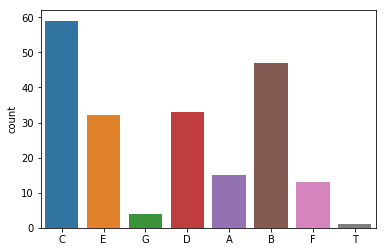

In [7]:
# キャビンデータの抽出(欠損値を除去)
df_Cabin = df_titanic['Cabin'][df_titanic['Cabin'].isnull()==False]

# 客室のクラスを抽出
Cabin_class = []
for Cabin in df_Cabin:
    Cabin_class.append(Cabin[:1])
    
# 客室のクラスのヒストグラムを表示
sns.countplot(Cabin_class)

## ペアプロットとヒートマップ

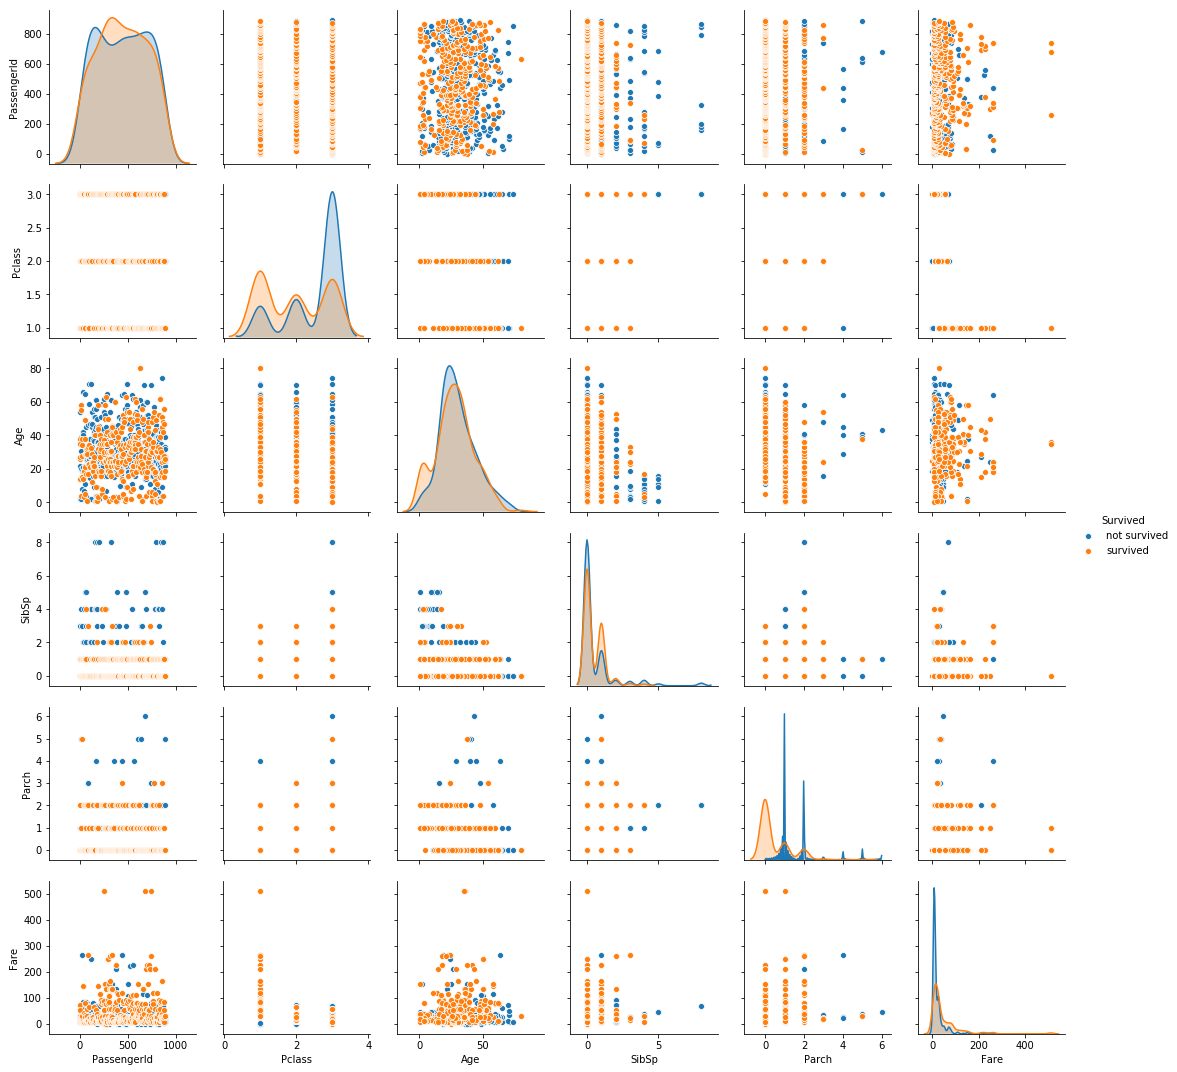

In [8]:
df_titanic['Survived'] = df_titanic['Survived'].map({
    0: 'not survived',
    1: 'survived'
})

sns.pairplot(df_titanic, hue='Survived')

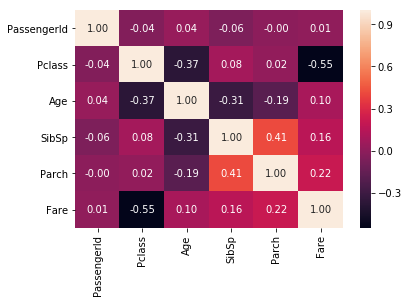

In [10]:
sns.heatmap(df_titanic.corr(), annot=True, fmt='.2f')

# データの分析・考察

[船内構造](https://pbs.twimg.com/media/D8B6AOlU8AAwscC.jpg)